In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk

In [4]:
data = open("SMSSpamCollection.tsv").read()

In [5]:
data[:50]

"ham\tI've been searching for the right words to tha"

In [6]:
parsedData = data.replace('\t','\n').split('\n')

In [7]:
type(parsedData)

list

In [8]:
parsedData[:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [9]:
labels = parsedData[0::2]
text = parsedData[1::2]

In [10]:
print(labels[:5])
print(text[:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [12]:
len(labels)

5571

In [13]:
len(text)

5570

In [14]:
df = pd.DataFrame({
    'Label': labels[:-1],
    'Text': text
})

In [15]:
df.head()

,Label,Text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [16]:
df.Label.value_counts()

ham     4824
spam     746
Name: Label, dtype: int64

In [17]:
df.Label.value_counts(normalize = True)

ham     0.866068
spam    0.133932
Name: Label, dtype: float64

In [18]:
df.isnull().sum()

Label    0
Text     0
dtype: int64

### Remove punctuation

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punct(text):
    noPunct = "".join([char for char in text if char not in string.punctuation])
    return noPunct

In [21]:
df['cleanText'] = df['Text'].apply(lambda x:remove_punct(x))

In [22]:
df.head()

,Label,Text,cleanText
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


### Tokenize

In [23]:
import re

In [24]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

In [25]:
df['tokens'] = df['cleanText'].apply(lambda x:tokenize(x.lower()))

In [26]:
df.head()

,Label,Text,cleanText,tokens
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


### Stopwords

In [27]:
stopwords = nltk.corpus.stopwords.words('english')

In [28]:
len(stopwords)

179

In [29]:
def remove_stopwords(text):
    noStop = [char for char in text if char not in stopwords]
    return noStop

In [30]:
df['noStopwords'] = df['tokens'].apply(lambda x:remove_stopwords(x))

In [31]:
df.head()

,Label,Text,cleanText,tokens,noStopwords
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


### Stemming

In [32]:
ps = nltk.PorterStemmer()

In [33]:
def stemming(text):
    stemmed_list = [ps.stem(x) for x in text]
    return stemmed_list

In [34]:
df['stemmed_text'] = df['noStopwords'].apply(lambda x:stemming(x))

In [35]:
df.head()

,Label,Text,cleanText,tokens,noStopwords,stemmed_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


### Lemmatizing

In [36]:
wn = nltk.WordNetLemmatizer()

In [37]:
wn.lemmatize('meaning')

'meaning'

In [38]:
def lemmaitize(text):
    lemmatizedText = [wn.lemmatize(word) for word in text]
    return lemmatizedText

In [39]:
df['lemmatized_text'] = df['noStopwords'].apply(lambda x:lemmaitize(x))

In [40]:
df.head()

,Label,Text,cleanText,tokens,noStopwords,stemmed_text,lemmatized_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


### Count vectorizer

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
count_vect = CountVectorizer()

In [43]:
vect_input = df['lemmatized_text'].map(' '.join)

In [44]:
X_counts = count_vect.fit_transform(vect_input)

In [45]:
print(X_counts.shape)

(5570, 8923)


In [46]:
print(count_vect.get_feature_names())

['008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p', '08701213186', '087

C:\Users\akshayd6\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
X_counts

<5570x8923 sparse matrix of type '<class 'numpy.int64'>'
	with 47384 stored elements in Compressed Sparse Row format>

In [48]:
X_counts_df = pd.DataFrame(X_counts.toarray())

In [49]:
X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8913,8914,8915,8916,8917,8918,8919,8920,8921,8922
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_counts_df.columns = count_vect.get_feature_names()

C:\Users\akshayd6\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
X_counts_df.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zogtorius,zoom,zouk,zyada,¾ã,ã¼,ã¼ll,ãœ,ãœll,œharry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### N-grams vectorizer

In [52]:
ngrams_vect = CountVectorizer(ngram_range = (2,2))

In [53]:
X_ngrams = ngrams_vect.fit_transform(vect_input)

In [54]:
ngrams_vect.get_feature_names()

C:\Users\akshayd6\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['008704050406 sp',
 '0089my last',
 '0121 2025050',
 '01223585236 xx',
 '01223585334 cum',
 '0125698789 ring',
 '02 user',
 '020603 2nd',
 '0207 153',
 '02072069400 bx',
 '02073162414 cost',
 '02085076972 reply',
 '020903 2nd',
 '021 3680',
 '021 3680offer',
 '050703 tcsbcm4235wc1n3xx',
 '06 good',
 '07046744435 arrange',
 '07090298926 reschedule',
 '07099833605 reschedule',
 '07123456789 87077',
 '0721072 find',
 '07732584351 rodger',
 '07734396839 ibh',
 '07742676969 show',
 '07753741225 show',
 '0776xxxxxxx uve',
 '077xxx 2000',
 '07801543489 guaranteed',
 '07808 xxxxxx',
 '07808247860 show',
 '07808726822 awarded',
 '07815296484 show',
 '0784987 show',
 '0789xxxxxxx today',
 '0796xxxxxx today',
 '07973788240 show',
 '07xxxxxxxxx 2000',
 '07xxxxxxxxx show',
 '0800 0721072',
 '0800 169',
 '0800 18',
 '0800 195',
 '0800 1956669',
 '0800 505060',
 '0800 542',
 '08000407165 18',
 '08000776320 reply',
 '08000839402 2stoptx',
 '08000839402 2stoptxt',
 '08000839402 call',
 '08000839402 ca

In [55]:
X_ngrams_df = pd.DataFrame(X_ngrams.toarray())
X_ngrams_df.columns = ngrams_vect.get_feature_names()

In [56]:
X_ngrams_df.head()

,008704050406 sp,0089my last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,0207 153,02072069400 bx,...,ãœ still,ãœ takin,ãœ thk,ãœ wait,ãœ wan,ãœ wana,ãœ want,ãœ write,ãœll take,œharry potter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Vectorizer

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tfidf = TfidfVectorizer()

In [59]:
X_tfidf = tfidf.fit_transform(vect_input)

In [60]:
X_tfidf.shape

(5570, 8923)

In [61]:
tfidf.get_feature_names()

C:\Users\akshayd6\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['008704050406',
 '0089my',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '0207',
 '02070836089',
 '02072069400',
 '02073162414',
 '02085076972',
 '020903',
 '021',
 '050703',
 '0578',
 '06',
 '060505',
 '061104',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0794674629107880867867',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073'

In [62]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf.get_feature_names()

In [63]:
X_tfidf_df

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zogtorius,zoom,zouk,zyada,¾ã,ã¼,ã¼ll,ãœ,ãœll,œharry
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.378214,0.0,0.0,0.0,0.0
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
df['tfidf'] = 

### Feature creation

#### Length of text not including spaces

In [64]:
df['textLength'] = df['cleanText'].apply(lambda x: len(x) - x.count(" "))

In [65]:
df.head()

,Label,Text,cleanText,tokens,noStopwords,stemmed_text,lemmatized_text,textLength
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,...",156
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",122
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",47
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,...",60
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",26


### % of punctuation present in text

In [70]:
def percent_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    perc = (count/len(text))*100
    return perc

In [71]:
df['percent_of_punct'] = df['Text'].apply(lambda x: percent_punct(x))

In [72]:
df.head()

,Label,Text,cleanText,tokens,noStopwords,stemmed_text,lemmatized_text,textLength,percent_of_punct
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,...",156,2.040816
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",122,3.870968
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",47,3.278689
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,...",60,2.597403
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",26,5.714286


#### Number of exclamation marks(!) or question marks(?)

In [93]:
def excl_quest(text):
    count1 = text.count("?")
    count2 = text.count("!")
    return count1 + count2

In [94]:
df['excl_or_quest'] = df['Text'].apply(lambda x: excl_quest(x))

In [100]:
df[df['excl_or_quest'] == 13]

,Label,Text,cleanText,tokens,noStopwords,stemmed_text,lemmatized_text,textLength,percent_of_punct,excl_or_quest
2499,ham,Ola would get back to you maybe not today but ...,Ola would get back to you maybe not today but ...,"[ola, would, get, back, to, you, maybe, not, t...","[ola, would, get, back, maybe, today, told, di...","[ola, would, get, back, mayb, today, told, dir...","[ola, would, get, back, maybe, today, told, di...",230,4.901961,13


#### Number of capital letters

In [119]:
def caps_count(text):
    count = sum([1 for char in text if char.isupper() == 1])
    return count

In [120]:
df['number_of_uppercase'] = df['cleanText'].apply(lambda x: caps_count(x))

In [121]:
df.head()

,Label,Text,cleanText,tokens,noStopwords,stemmed_text,lemmatized_text,textLength,percent_of_punct,excl_or_quest,number_of_uppercase
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,...",156,2.040816,0,3
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",122,3.870968,0,10
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",47,3.278689,0,2
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,...",60,2.597403,0,2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",26,5.714286,2,26


### Visualizations

In [126]:
from matplotlib import pyplot as plt
%matplotlib inline

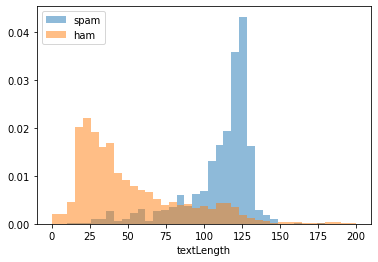

In [152]:
bins = np.linspace(0,200,40)
plt.hist(df[df['Label'] == 'spam']['textLength'],bins = bins,alpha = 0.5,density = True, label = 'spam')
plt.hist(df[df['Label'] == 'ham']['textLength'],bins = bins,alpha = 0.5,density = True, label = 'ham')
plt.legend(loc = 'upper left')
plt.xlabel("textLength")
plt.show()

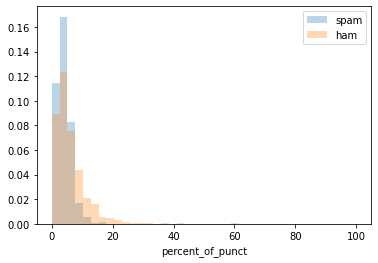

In [146]:
bins = np.linspace(0,100,40)
plt.hist(df[df['Label'] == 'spam']['percent_of_punct'],bins = bins,alpha = 0.3,density = True, label = 'spam')
plt.hist(df[df['Label'] == 'ham']['percent_of_punct'],bins = bins,alpha = 0.3,density = True, label = 'ham')
plt.legend(loc = 'upper right')
plt.xlabel("percent_of_punct")
plt.show()

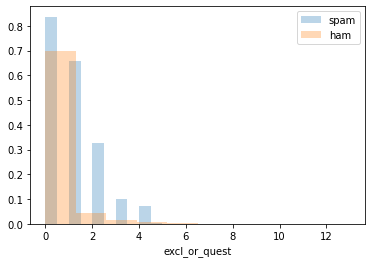

In [145]:
bins = np.linspace(0,25,10)
plt.hist(df[df['Label'] == 'spam']['excl_or_quest'],alpha = 0.3,density = True, label = 'spam')
plt.hist(df[df['Label'] == 'ham']['excl_or_quest'],alpha = 0.3,density = True, label = 'ham')
plt.legend(loc = 'upper right')
plt.xlabel("excl_or_quest")
plt.show()

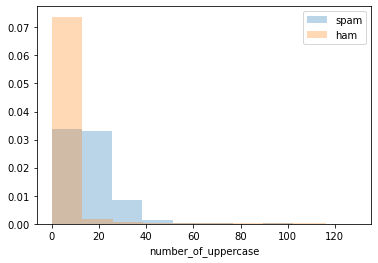

In [147]:
bins = np.linspace(0,25,10)
plt.hist(df[df['Label'] == 'spam']['number_of_uppercase'],alpha = 0.3,density = True, label = 'spam')
plt.hist(df[df['Label'] == 'ham']['number_of_uppercase'],alpha = 0.3,density = True, label = 'ham')
plt.legend(loc = 'upper right')
plt.xlabel("number_of_uppercase")
plt.show()

In [162]:
df[df['percent_of_punct'] == 60]

,Label,Text,cleanText,tokens,noStopwords,stemmed_text,lemmatized_text,textLength,percent_of_punct,excl_or_quest,number_of_uppercase
1269,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.0,0,1
1315,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.0,0,1
1423,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.0,0,1
1479,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.0,0,1
1696,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.0,0,1
2318,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.0,0,1
2505,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.0,0,1
2656,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.0,0,1
3152,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.0,0,1
4855,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.0,0,1


In [163]:
df.sort_values(by = ['percent_of_punct'],ascending=False).head(50)

,Label,Text,cleanText,tokens,noStopwords,stemmed_text,lemmatized_text,textLength,percent_of_punct,excl_or_quest,number_of_uppercase
4820,ham,:-) :-),,"[, ]","[, ]","[, ]","[, ]",0,85.714286,0,0
3372,ham,:),,"[, ]","[, ]","[, ]","[, ]",0,66.666667,0,0
1315,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.000000,0,1
3152,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.000000,0,1
1479,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.000000,0,1
2656,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.000000,0,1
4855,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.000000,0,1
2318,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.000000,0,1
1696,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.000000,0,1
2505,ham,Ok...,Ok,[ok],[ok],[ok],[ok],2,60.000000,0,1


### Model using count vectorized data

#### Random forest

In [192]:
counts_data = pd.concat([X_counts_df,df['textLength'],df['percent_of_punct'],df['excl_or_quest']],axis = 1)

In [182]:
counts_data.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zyada,¾ã,ã¼,ã¼ll,ãœ,ãœll,œharry,textLength,percent_of_punct,excl_or_quest
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,156,2.040816,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,122,3.870968,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,47,3.278689,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,60,2.597403,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,26,5.714286,2


In [190]:
from sklearn.model_selection import train_test_split
X = counts_data
y = df['Label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
from sklearn.model_selection import KFold, cross_val_score

In [201]:
rf = RandomForestClassifier(n_estimators=50,max_depth=20,n_jobs = -1)
rf_count_model = rf.fit(X_train,y_train)

In [202]:
rf_count_model.score(X_test,y_test)

0.926391382405745

In [203]:
rf_count_preds = rf_count_model.predict(X_test)

In [204]:
from sklearn.metrics import classification_report

In [205]:
print(classification_report(y_test,rf_count_preds))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       958
        spam       1.00      0.47      0.64       156

    accuracy                           0.93      1114
   macro avg       0.96      0.74      0.80      1114
weighted avg       0.93      0.93      0.91      1114



In [199]:
feature_imps = sorted(zip(rf.feature_importances_,counts_data.columns),reverse=True)

In [200]:
feature_imps

[(0.06622897492145118, 'textLength'),
 (0.04823208517819752, 'claim'),
 (0.038503996982172405, 'free'),
 (0.031343101405465125, 'call'),
 (0.029100353262116976, 'txt'),
 (0.025412349909603803, 'text'),
 (0.024047525495302757, 'prize'),
 (0.02394519899739104, 'mobile'),
 (0.02249420115870917, 'tone'),
 (0.014753731346915074, '16'),
 (0.013924379263066833, 'guaranteed'),
 (0.01216105738920894, 'win'),
 (0.011913010482463009, 'urgent'),
 (0.011527665246171062, 'contact'),
 (0.010982424489288257, 'cash'),
 (0.010106955695774023, 'service'),
 (0.009979630438130584, 'customer'),
 (0.00985256971122529, 'tc'),
 (0.00977821778154079, 'reply'),
 (0.008476151225582101, '100'),
 (0.008324620819560497, 'stop'),
 (0.008224910302123039, 'nokia'),
 (0.007765429313061313, 'chat'),
 (0.0077137578073666405, 'per'),
 (0.0077022733199090055, 'po'),
 (0.007468502924845092, '18'),
 (0.007413400625332512, 'bonus'),
 (0.007294232199590872, 'percent_of_punct'),
 (0.007187361560242343, '2000'),
 (0.0068170565363

In [187]:
cross_val_score(rf, X_train,y_train, cv = kfold,scoring = 'accuracy', n_jobs = -1)

array([0.97845601, 0.97755835, 0.97576302, 0.96588869, 0.97217235])

### Model using ngrams vectorized data

In [206]:
ngrams_data = pd.concat([X_ngrams_df,df['textLength'],df['percent_of_punct'],df['excl_or_quest']],axis = 1)

In [207]:
X = ngrams_data
y = df['Label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [208]:
rf1 = RandomForestClassifier(n_estimators=50,max_depth=20,n_jobs = -1)
rf_ngrams_model = rf1.fit(X_train,y_train)

In [209]:
rf_ngrams_model.score(X_test,y_test)

0.8707360861759426

In [210]:
rf_ngrams_preds = rf_ngrams_model.predict(X_test)

In [211]:
print(classification_report(y_test,rf_ngrams_preds))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       958
        spam       1.00      0.08      0.14       156

    accuracy                           0.87      1114
   macro avg       0.93      0.54      0.54      1114
weighted avg       0.89      0.87      0.82      1114



### Model using tf-idf vectorized data

In [212]:
tfidf_data = pd.concat([X_tfidf_df,df['textLength'],df['percent_of_punct'],df['excl_or_quest']],axis = 1)

In [213]:
X = tfidf_data
y = df['Label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [214]:
rf2 = RandomForestClassifier(n_estimators=50,max_depth=20,n_jobs = -1)
rf_tfidf_model = rf2.fit(X_train,y_train)

In [215]:
rf_tfidf_model.score(X_test,y_test)

0.9299820466786356

In [216]:
rf_tfidf_preds = rf_tfidf_model.predict(X_test)

In [217]:
print(classification_report(y_test,rf_tfidf_preds))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       958
        spam       1.00      0.50      0.67       156

    accuracy                           0.93      1114
   macro avg       0.96      0.75      0.81      1114
weighted avg       0.94      0.93      0.92      1114

